In [27]:
library(survival)
library(survminer)
library(dplyr)
library(ggplot2)
library(lubridate)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)
library(sjPlot)

In [28]:
ggsurvsave <- function(filename, plot = last_plot(), ...) {

  if (!inherits(plot, "ggsurvplot")) {
    stop("Argument plot does is not a ggsurvplot object.")
  }
  gsp <-
    Reduce(
      '/',
      Filter(
        function(x) inherits(x, "ggplot"),
        plot
      )
    )
  ggsave(filename = filename, plot = gsp, ...)

}

In [10]:
df <- read.csv("../../../data/clinical/processed/su2c-test-survival.tsv",
               sep='\t', 
               row.names=1)

df$OS.Event <- as.logical(df$OS.Event)

In [11]:
df

,LinearSVMPrediction,OS.Event,OS,ElasticNetPrediction,RBFSVMPrediction,PFS.Event,PFS
,<int>,<lgl>,<dbl>,<int>,<int>,<dbl>,<dbl>
SU2CLC-MDA-1563-T1,0,TRUE,212,0,0,1,62
SU2CLC-DFC-1002-T1,0,FALSE,1108,0,1,1,58
SU2CLC-MGH-1572-T1,0,FALSE,160,0,0,1,81
SU2CLC-MGH-1418-T1,1,FALSE,997,1,1,0,997
SU2CLC-DFC-1001-T1,0,TRUE,236,0,0,NA,NA
SU2CLC-DFC-1534-T1,0,TRUE,10,0,0,1,10
SU2CLC-COL-1025-T1,1,FALSE,155,0,0,0,155
SU2CLC-DFC-DF0241-T1,1,TRUE,937,1,1,1,772
SU2CLC-MGH-1568-T1,0,FALSE,188,0,1,1,43


In [12]:
surv_object <- Surv(time = df$OS, event = df$OS.Event)

fit1 <- survfit(surv_object ~ LinearSVMPrediction, data = df)
gg <- ggsurvplot(fit1, data = df, pval = TRUE)

#ggsurvsave("../../../figures/su2c/linear-svm-os-survival-kaplan-meier.png", 
#       plot = gg, 
#       width = 5.0, 
#       height = 5.0, 
#       dpi = 300)

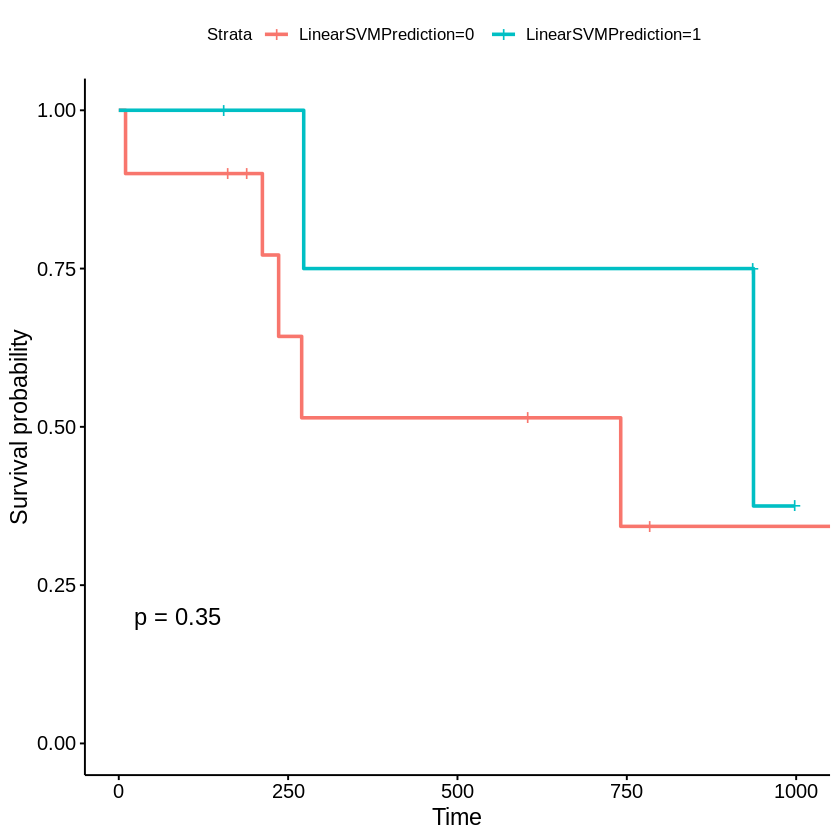

In [13]:
gg

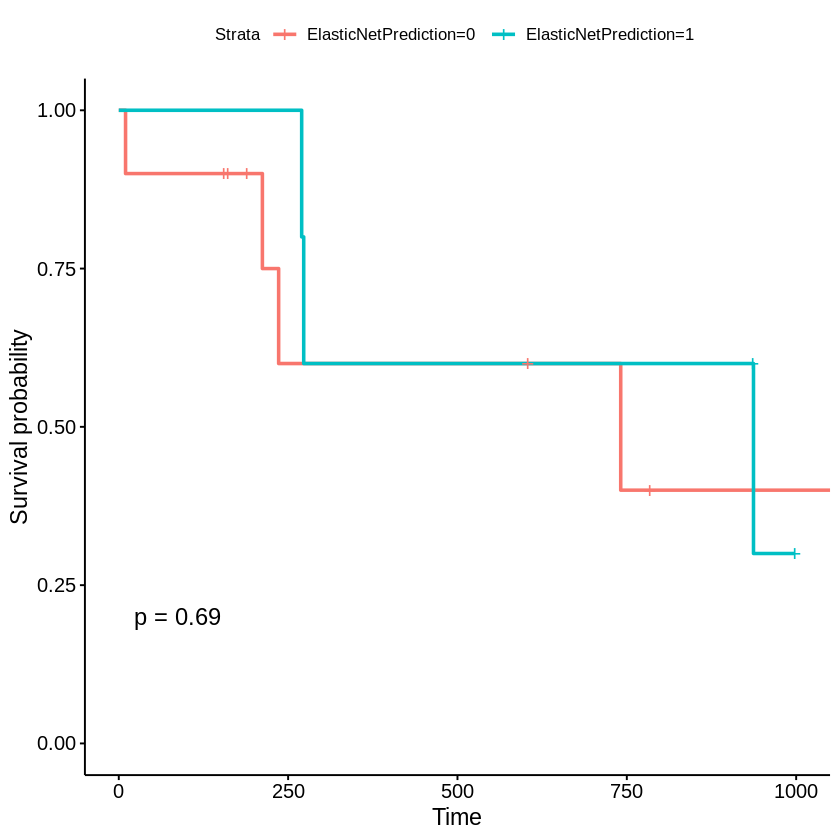

In [24]:
surv_object <- Surv(time = df$OS, event = df$OS.Event)

fit1 <- survfit(surv_object ~ ElasticNetPrediction, data = df)
gg <- ggsurvplot(fit1, data = df, pval = TRUE)

ggsurvsave("../../../figures/su2c/elastic-net-os-survival-kaplan-meier.png", 
       plot = gg, 
       width = 5.0, 
       height = 5.0, 
       dpi = 1000)

gg

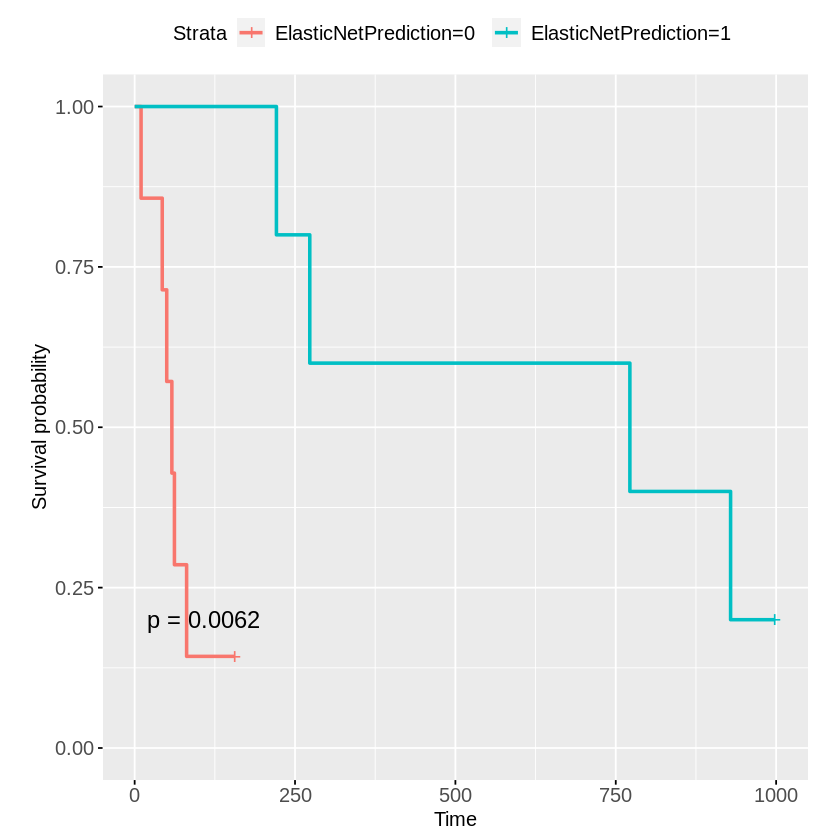

In [37]:
surv_object <- Surv(time = df$PFS, event = df$PFS.Event)

fit1 <- survfit(surv_object ~ ElasticNetPrediction, data = df)

gg <- ggsurvplot(fit1, data = df, pval = TRUE, ggtheme = theme(aspect.ratio = 1))

gg <- ggpar(gg, 
      font.main = 12,
      font.x = 12,
      font.y = 12,
      font.caption = 12, 
      font.legend = 12, 
      font.tickslab = 12,
      width=6.0,
      height=6.0)

ggsurvsave("../../../figures/su2c/elastic-net-pfs-survival-kaplan-meier.png", 
       plot = gg, 
       width = 6.0, 
       height = 6.0, 
       dpi = 1000)

gg

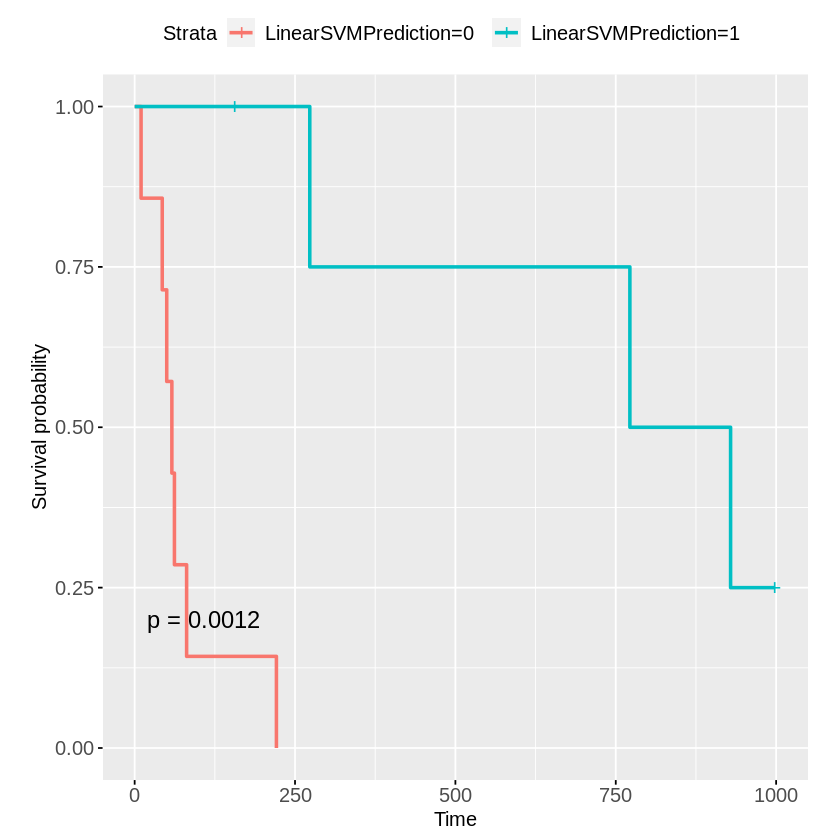

In [39]:
surv_object <- Surv(time = df$PFS, event = df$PFS.Event)

fit1 <- survfit(surv_object ~ LinearSVMPrediction, data = df)

gg <- ggsurvplot(fit1, data = df, pval = TRUE, ggtheme = theme(aspect.ratio = 1))

gg <- ggpar(gg, 
      font.main = 12,
      font.x = 12,
      font.y = 12,
      font.caption = 12, 
      font.legend = 12, 
      font.tickslab = 12,
      width=6.0,
      height=6.0)

ggsurvsave("../../../figures/su2c/linear-svm-pfs-survival-kaplan-meier.png", 
       plot = gg, 
       width = 6.0, 
       height = 6.0, 
       dpi = 1000)

gg

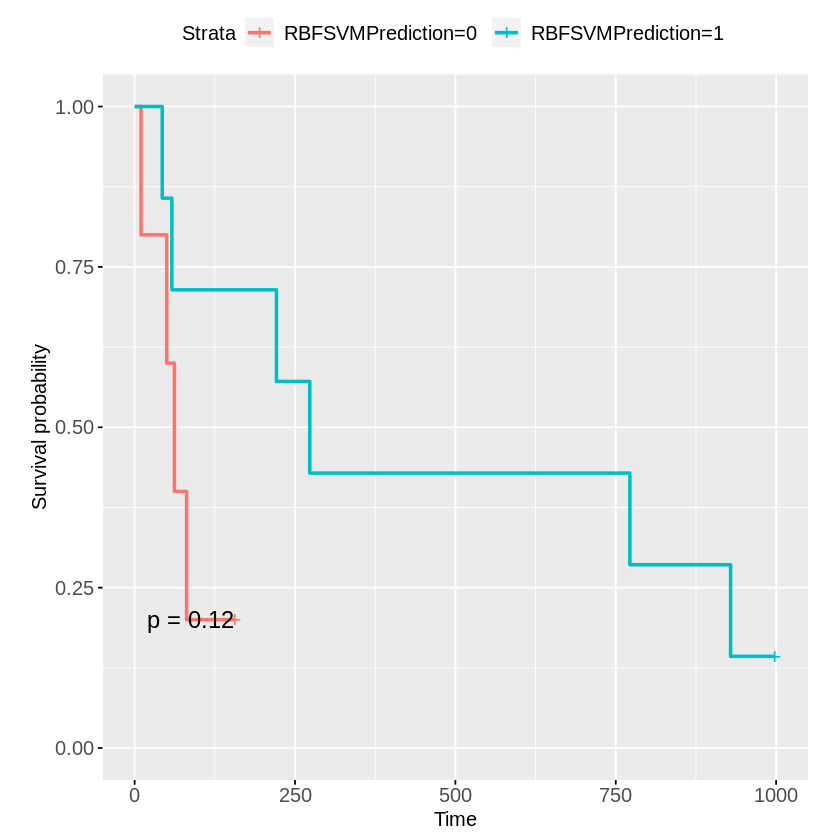

In [38]:
surv_object <- Surv(time = df$PFS, event = df$PFS.Event)

fit1 <- survfit(surv_object ~ RBFSVMPrediction, data = df)

gg <- ggsurvplot(fit1, data = df, pval = TRUE, ggtheme = theme(aspect.ratio = 1))

gg <- ggpar(gg, 
      font.main = 12,
      font.x = 12,
      font.y = 12,
      font.caption = 12, 
      font.legend = 12, 
      font.tickslab = 12,
      width=6.0,
      height=6.0)

ggsurvsave("../../../figures/su2c/rbf-svm-pfs-survival-kaplan-meier.png", 
       plot = gg, 
       width = 6.0, 
       height = 6.0, 
       dpi = 1000)

gg